In [1]:
%matplotlib inline
from __future__ import print_function

import pandas as pd
import numpy as np
from sklearn import cross_validation
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train_file = '../input/train.csv'
store_file = '../input/store.csv'
train = pd.read_csv(train_file, low_memory=False)
store = pd.read_csv(store_file, low_memory=False)

In [15]:
train.head()
#train = train.loc[train.Sales > 0]

In [16]:
train_store = pd.merge(train, store, on='Store')

In [17]:
# 筛选promo2=1的数据
promo_store = store[store.Promo2==1].Store
# 重新编号
promo_store = promo_store.reset_index(drop=True)

In [44]:
promo_interval.unique()[2]

'Mar,Jun,Sept,Dec'

In [45]:
promo_interval = store[store.Promo2==1].PromoInterval
(promo_interval==promo_interval.unique()[2]).sum()

106

In [18]:
#for i, store in promo_store.iteritems():
st = promo_store.iloc[0]
store_sales_train = (train[train.Store==st])[['Date', 'Sales'] ]

In [19]:
store_sales_train.head()

Date  Sales
1     2015-07-31   6064
1116  2015-07-30   5567
2231  2015-07-29   6402
3346  2015-07-28   5671
4461  2015-07-27   6627

In [20]:
store_sales_train.Date.min()

'2013-01-02'

In [21]:
store_sales_train.Date.max()

'2015-07-31'

In [22]:
date = pd.date_range(start=store_sales_train.Date.min(), end=store_sales_train.Date.max(), freq='D')

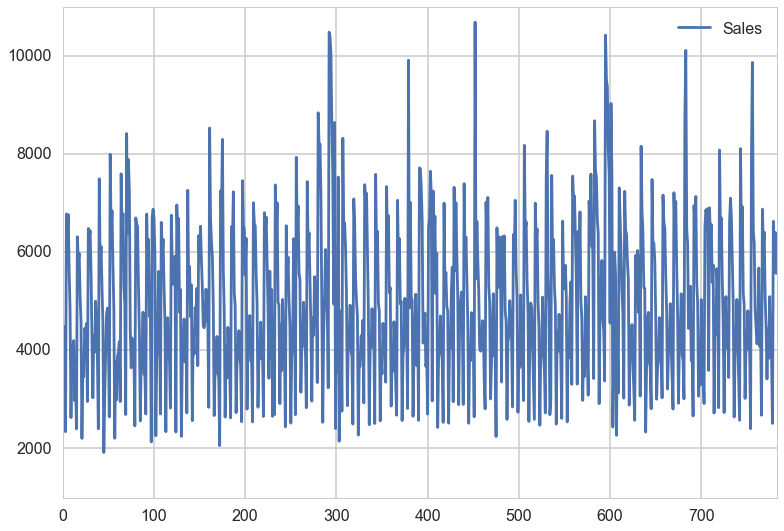

In [27]:
store_sales_train.plot()

In [28]:
store_sales_train = store_sales_train.sort('Date').reset_index(drop=True)

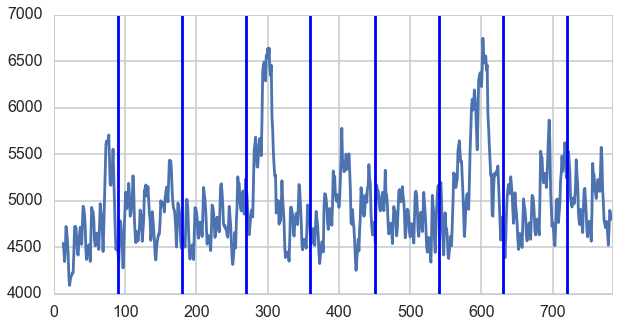

In [29]:
ax = (pd.rolling_mean(store_sales_train.Sales, 14)).plot(figsize=(10,5))
#  range（10）， axvline：画10条线
for i in range(10):
    plt.axvline(90*(i+1))

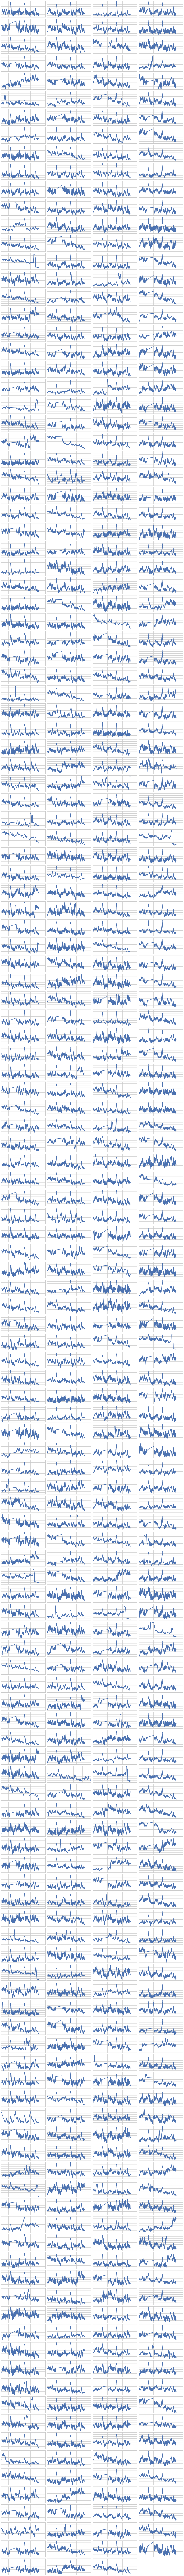

In [30]:
fig = plt.figure(figsize=(18,250))
for i in range(571):
    ax = fig.add_subplot(143,4, i+1)
    st = promo_store.iloc[i]
    store_sales_train = (train[train.Store==st])[['Date', 'Sales'] ]
    ax.plot(pd.rolling_mean(store_sales_train.Sales, 14))
    ax.grid(True)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
fig.tight_layout()

In [ ]:
len(store_sales_train)

Fourier Transform

In [ ]:

fig = plt.figure(figsize=(18,360))
for i in range(571):
    ax = fig.add_subplot(143,4, i+1)
    sample_rate = 1.0
    st = promo_store.iloc[i]
    store_sales_train = (train[train.Store==st])[['Date', 'Sales'] ]
    length = len(store_sales_train)
    f = np.abs(np.fft.rfft(store_sales_train.Sales))
    ax.plot(np.fft.rfftfreq(length, sample_rate)[1:], (f)[1:], 'o', ms=6)
    ax.plot(np.fft.rfftfreq(length, sample_rate)[1:], (f)[1:], '-')
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=6)
    plt.axvline(1.0/90)
    plt.xlabel("period (days)", fontsize=6)
fig.tight_layout()
